# NLP: Text Clustering

<b>Objective:</b><br>Implement text analytics on religious texts and cluster the texts using Natural Language Processing.<br>
    Convert the text data to numeric data and find the optimal k value for clustering using Ded Algorithm.This optimal k value is used to cluster the text data.
    

<b>Problem Statement:</b> <br>
    Given a text file group the sentences into different topics using clustering techniques. <br>
    Here we have a text file which consists of sentences from different religious books.<br>
    Find the number of unique words and convert the text data into numeric data.<br>
    Find the optimal k value for clustering and cluster the sentences of different religious groups.

<b>Procedure:</b><br>
    1) Read the given text file. <br>
    2) Text Preprocessing <br>  >
       a)Removing the numbers,special characters,spaces etc <br>  > 
       b)Tokenisation of sentences <br> >
       c)Removing the stopwords <br> >
       d)Lemmitization : Words are converted to its root word. <br>
    3) Vectorisation of the cleaned text data : Text data is converted to numeric data <br>
    4) Apply Dimensionality reduction Technique to reduce the features. <br>
    5) Find the optimal k value for clustering using Ded Algorithm <br>
    6) Cluster the sentences using the k value obtained from the Ded Algorithm. <br>
    7) Inferences after Clustering.
    

<b>Pseudocode:</b><br>
1)Import all the libraries <br>
2)Read the text data using open.readlines() <br>
3)Remove the alternate lines which consists of only numbers : for i in range(no of sentences)<br>
                                                              remove rows for which i/2 = 0 <br>
                                                              
4)Text Preprocessing:<br>
 1) Make an instance of WordNetLemmitizer <br>
 2) for i in range of len(sentences) <br>
     Remove all characters other than alphabets <br>
     Remove the white space <br>
     Split the words <br>
     Remove the stopwords <br>
     corpus <= Lemmitize the words: converting to root word. <br>
5) Vectorize the sentences => numeric data as an array of sentences X unique words using Bag of words/Tfidf <br>
6) Dimensionality Reduction using Truncated SVD <br>
7) svd_model DataFrame <= Truncated SVD Array <br>
8) Optimal k value using Ded Algorithm <br>
    1 Di <=Ddepth of each point xi in dataset X using Mahalanobis depth.  <br>
    2. DM <= max(Di)  <br>
    3. Delta <= (Di - DM ).mean() <br>
    4. Partition the dataset X into k partitions, for k = 2...20. Each partition (start: end) represents one cluster Ck, 
        for k = (2,20) For each cluster Ck, it fnds the depth (Dki) of each point xi within the cluster Ck and also fnds the           depth median (DMk) of each cluster Ck <br>
    5. Deltak <= Average diference between Dki and DMk of the kth cluster <br>
    6. DW <= Average of △kof k clusters <br>
    7. DB <= Diff(DW- △ )<br>
    8. Ded = DW-DB<br>
    9. k = index(max(Ded))<br>
9) Different Clustering Methods for clustering:<br>
    K Means Clustering using the optimal k <br>
    Hierarchical Clustering <br>
    Spectral Clustering<br>
    Latent Dirichlet Allocation <br>
    NonNegative Matrix Factorisation <br>

    
     
 

# Python Code

In [1]:
#Importing the packages
import os
os.chdir('C:/Users/sreepa/Downloads')
#package for natural language processing
import nltk
#provides regular expression matching operations
import re
#Lemmatize using WordNet's built-in morphy function.
#Returns the input word unchanged if it cannot be found in WordNet.
from nltk.stem import WordNetLemmatizer
#to find the stop word(commonly used word)
from nltk.corpus import stopwords
#Tokenizers divide strings into lists of substrings.
from nltk.tokenize import word_tokenize
#Convert a collection of raw documents to a matrix of TF-IDF features.
from sklearn.feature_extraction.text import TfidfVectorizer
#Convert a collection of text documents to a matrix of token counts
from sklearn.feature_extraction.text import CountVectorizer
import string
#Pandas - to work with dataframes
import pandas as pd
#Mathematical calculations
import numpy as np
#provides a uniform interface to fast distance metric functions
from sklearn.neighbors import DistanceMetric
#Visualization
import matplotlib.pyplot as plt
#Gensim is a Python library for topic modelling, document indexing etc
import gensim
from gensim import corpora, models
#Metrics for clustering: for matrix
from sklearn.metrics.cluster import contingency_matrix
#compute the adjusted rand score
from sklearn.metrics import adjusted_rand_score
from sklearn.decomposition import NMF
from sklearn.decomposition import TruncatedSVD
from sklearn import cluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import SpectralClustering
from sklearn.decomposition import LatentDirichletAllocation

In [2]:
#Reading the text file
myfile = open("C:\\Users\\sreepa\\Downloads\\Complete_data .txt")

para=myfile.readlines()

<b>Text PreProcessing</b><br>
Text Preprocessing steps are <br>
1)Tokenisation : Splitting the text documents into smaller units.<br>
2)Converting uppercase to lower case<br>
3)Stopwords removal : most common words<br>
4)Removing the numbers<br>
5)Removing punctuations<br>
6)Lemmitization : converts the word to a meaningful base form called Lemma

In [3]:
#Removing the punctuations,numbers,stopwords,whitespaces,lowercase conversion and Lemmitization of the textdata.
wordnet=WordNetLemmatizer()
corpus = []
for i in range(len(para)):
    review = re.sub('[^a-zA-Z]', ' ', para[i])
    review = re.sub(r'\s+', ' ', review)
    review = review.lower()
    review = review.split()
    #review = nltk.sent_tokenize(review)
    review = [wordnet.lemmatize(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

#Word CLoud is the EDA equivalent for NLP. Word cloud helps us understand how different words are distributed across the documents. The most occurring words will have larger sizes.

(-0.5, 399.5, 199.5, -0.5)

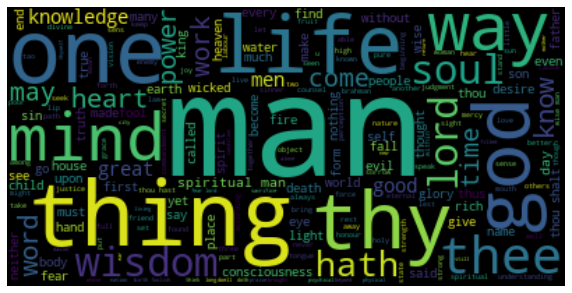

In [4]:
textall = " ".join(corpus)
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

wordcloud = WordCloud().generate(textall)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

#'man' ,'thing', 'life' , 'one', 'thy','thee', 'lord','god' etc are the most occuring words. From these words we can understand that the document is related to religion.

In [5]:
#converting to dataframe
df=pd.DataFrame(corpus)

In [6]:
#Resetting the index
df.reset_index(drop=True,inplace=True)

In [7]:
df.head()

,0
0,
1,buddha think rahula mirror buddha rahula refle...
2,
3,blessed one staying kosambi simsapa tree grove...
4,


In [8]:
#Renaming the column
df.rename(columns = {' ':'Id',0:'sentences'},inplace = True)

In [9]:
#Dropping the rows without columns
df.drop(df[df['sentences']==''].index,inplace=True)
df.reset_index(drop=True,inplace=True)

In [10]:
df.head(10)

,sentences
0,buddha think rahula mirror buddha rahula refle...
1,blessed one staying kosambi simsapa tree grove...
2,stress known cause stress come play known dive...
3,vision arose clear knowing arose discernment a...
4,sariputta three form stressfulness friend stre...
5,sariputta friend noble truth stress birth stre...
6,savatthi blessed one said monk teach five aggr...
7,buddha five clinging aggregate form clinging a...
8,call form rupa afflicted ruppati thus called f...
9,mahakotthita feeling perception consciousness ...


#<b>After all preprocessing obtained rows are 589

<b>Vectorization </b> <br>
Converting the text to numerical data:<br>
Bag of words:Occurence of word in the document<br>
TfIdf Vectorization : It is the product of Term Frequency and the Inverse Document Frequency
    <br>Term Frequency : how frequently a word occuring in the document.<br>
        TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document).<br>
    <br>Inverse Document Frequency: Measures the importance of a word in the document.<br>
        IDF(t) = log_e(Total number of documents / Number of documents with term t in it).
    

In [11]:
#Tfidf Vectorisation
vectorizer = TfidfVectorizer()
Y = vectorizer.fit_transform(df['sentences'])

In [12]:
Y.shape[1]

7182

<b>Unique words : </b> after vectorisation is 7182<br>
    Shape of matrix after vectorisation is 589 X 7182

In [14]:
#Dimensionality reduction of Tfidf Vector
svd = TruncatedSVD(n_components=560,n_iter=7, random_state=10)
svd_model=svd.fit_transform(Y)
print(svd.explained_variance_ratio_.sum())

0.988374490149885


Dimensionality reduction is done for the vectorised data since it has 7186 columns. Truncated SVD is used for dimensionality reduction. The Explained variance is 98.8%<br>
Features got after dimensionality reduction is 560.

In [15]:
svd_model.shape

(589, 560)

After dimensionality reduction there are 589 rows and 560 columns. This data is used for clustering

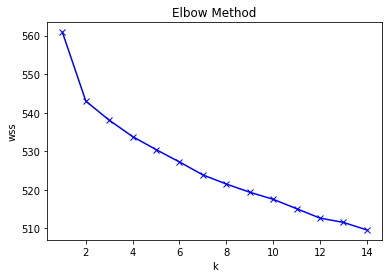

In [16]:
#Finding the optimal k value using elbow method
wss = []
K = range(1,15)
for k in K:
    km = cluster.KMeans(n_clusters=k,init='k-means++', n_init=100)
    km = km.fit(svd_model)
    wss.append(km.inertia_)


plt.plot(K, wss, 'bx-')
plt.xlabel('k')
plt.ylabel('wss')
plt.title('Elbow Method')
plt.show()

From the elbow plot its evident that there is a drasctic drop when k=2 and the elbow is formed when k=8 or 9 . From this elbow plot it is difficult to reach the optimal k value.

# Determining the optimal k value using Ded Algorithm

Ded Algorithm is used to find the optimal k value using the MAhalanobis function. Here each point is considered as the center and we need to find the pairwise distance. After finding the pairwise distance the DepthMedian is taken. Then the average diference between the 
depths of points within the dataset X and the depth median is calculated. After that the dataset is divided to partitions depending on the cluster number. For each cluster the same process is repeated and the average diference between the  depths of points within the dataset X and the depth 
median is calculated.Average value of the k clusters is also calculated.Depth between the cluster is also calculated.The depth diference (DeD) is the diference between depth within cluster (DW) and depth between cluster.

In [17]:
def mahalanobis(data=None, cov=None):
    cov = np.cov(data.values.T)
    inv_covmat = np.linalg.inv(cov)
    DepMed=[]
    for m in range(data.shape[0]):
        mdepth_i=[]
        for n in range(data.shape[0]):
            Xi=data.iloc[m,:]-data.iloc[n,:]
            left_term = np.dot(Xi, inv_covmat)
            mah = np.dot(left_term, Xi.T)
            mdepth_i.append(mah)
            
        array=np.array(mdepth_i)  
        Dmed=1/(1+array)
        depmedian=np.median(Dmed)   
        DepMed.append(depmedian)
     
    mahal=DepMed
    return (mahal)

[0.0007100613018595098, 0.0007466883408193344, 0.0012895863783481576, 0.0008762073481003008, 0.0007301742889050869, 0.0009425784954302344, 0.002040217426139426, 0.0010443674496626214, 0.0015675531080679272, 0.0013233979801920504, 0.0013701016602329845, 0.0012894881964102714, 0.0010749672194104894]


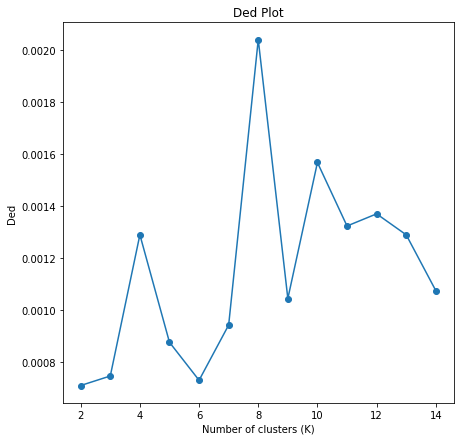

In [18]:
#data=pd.DataFrame(reduced_features)
data=pd.DataFrame(svd_model)
#Algorith Step3
Text_Mah=mahalanobis(data=data[data.columns])
#Algorith Step4
Dmedian = np.max(Text_Mah)
#Algorith Step5
Text_MahDiff = abs((Text_Mah-Dmedian))
Delta = Text_MahDiff.mean()

n = data.shape[0]
Diff=0
Dedlist=[]
#Algorith Step 6 to Step 16
for k in range(2,15):
    ran = n//k
    start = 0
    end = 0
    Diff=0
    
    for j in range(1,k+1):
        end = start+ran-1
        D1 = mahalanobis(data=data.iloc[start:end,:])
        start = end+1
        DM = np.max(D1)
        Avgdiff = (abs((D1-DM))).mean()
        Diff=Diff + Avgdiff          
    
    #Algorith Step 17
    DW=Diff/k
    #Algorith Step 18
    DB=Delta-DW
    #Algorith Step 19
    Ded=DW-DB
    Dedlist.append(Ded)
    
print(Dedlist)

plt.figure(figsize = (7,7))
plt.plot(range(2,15),Dedlist,marker='o')
plt.title('Ded Plot')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Ded')
plt.show()


In [19]:
k=np.argmax(Dedlist)+2
print(k)

8


Optimal k value after running Ded Algorithm is 8. So I am considering 8 as the k value for clustering.

# K Means for Clustering

In [25]:
data=pd.DataFrame(svd_model)
data_km=data.copy()
data_hc=data.copy()
km=cluster.KMeans(n_clusters=8,init='k-means++',n_init=10,max_iter=300,random_state=42)
km.fit(data)

KMeans(random_state=42)

In [26]:
data_km['labels']=km.labels_

In [27]:
data_km['labels'].value_counts()

2    177
4     91
5     65
6     65
7     64
0     50
1     45
3     32
Name: labels, dtype: int64

In [28]:
dataKMeans=df.copy()
dataKMeans['labels']=km.labels_

Text(0.5, 1.0, 'Segregation of Clusters Using K Means')

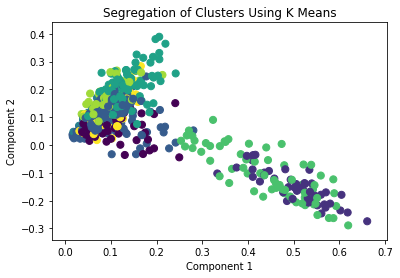

In [29]:
plt.scatter(svd_model[:,0],svd_model[:,1],s=50,c=km.labels_)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title("Segregation of Clusters Using K Means", )

<b>Observation></b><br>
By looking into the topics some words can be connected to the labels. But most of the topics are overlapping.Not able to classify the clusters properly using KMeans.

<b>Agglomorative Hierarchical Clustering</b>

In [31]:
h_cluster = AgglomerativeClustering(
    n_clusters=8, affinity='mahalanobis', linkage='complete').fit(data_hc)

In [32]:
data_hc['labels']=h_cluster.labels_

In [33]:
data_hc['labels'].value_counts()

1    143
6    134
4    116
2     97
0     60
3     27
7      8
5      4
Name: labels, dtype: int64

By checking the clusters Hierarchical clustering is not giving much information

<b>Spectral clustering</b>

In [34]:
clustering = SpectralClustering(n_clusters=8,
        assign_labels="discretize",
       random_state=42).fit(svd_model)

In [35]:
text_data2=df.copy()
text_data2['labels']=clustering.labels_
y_pred=clustering.labels_

In [36]:
text_data2['labels'].value_counts()

3    139
0    127
1     73
6     68
4     53
2     51
5     43
7     35
Name: labels, dtype: int64

In [37]:
Spec_data=df.copy()
Spec_data['labels']=clustering.labels_

Text(0.5, 1.0, 'Segregation of Clusters Using Spectral Clustering')

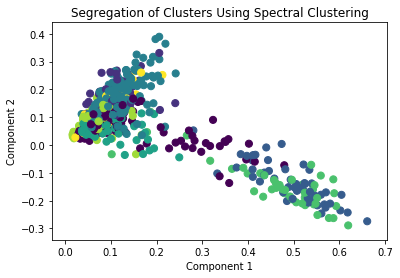

In [38]:
plt.scatter(svd_model[:,0],svd_model[:,1],s=50,c=y_pred)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title("Segregation of Clusters Using Spectral Clustering", )

In [90]:
testfile = open("C:\\Users\\sreepa\\Downloads\\labels_religions.txt")
labels = testfile.readlines()
label = []
for i in range(len(labels)):
    labe = re.sub('[^a-zA-Z]', ' ', labels[i])
    #labe = re.sub(r'\s+', ' ', labe)
    labe=labe.replace(" ", "")
    labe = labe.split()
    labe = ' '.join(labe)
    label.append(labe)
labels_data=pd.DataFrame(label)
labels_data.drop(index=13,inplace=True)
labels_data.rename(columns = {' ':'Id',0:'labels'},inplace = True)
labels_data['labels']=labels_data['labels'].map({'BuddhismCh':6,'TaoTeChingCh':0,'UpanishadCh':7,'YogaSutraCh':3,'BookOfProverbCh':4,'BookOfEcclesiastesCh':2,'BookOfEccleasiasticusCh':5,'BookOfWisdomCh':1})
true_labels=labels_data['labels']
predicted_labels=Spec_data['labels']
Spec_matrix=contingency_matrix(true_labels, predicted_labels)
print(Spec_matrix)
Spec_purity=np.sum(np.amax(Spec_matrix, axis=1)) / np.sum(Spec_matrix)
#print(Spec_purity)

[[ 73   1   0   0   0   0   4   3]
 [  9   0   7   0   0   3   0   0]
 [  3   0   6   0   0   3   0   0]
 [ 17  16   1 137   0   1  12   5]
 [  2   0  19   0   0  10   0   0]
 [  9   0  18   0   0  23   0   0]
 [  3   0   0   1   0   0  40   1]
 [ 11  56   0   1  53   3  12  26]]


Number of Correctly Classified Samples:305 <br>
Number of incorrectly classified topics :284

In [40]:
adjusted_rand_score(true_labels, predicted_labels)

0.4397926233451066

# Latent Dirichlet Allocation

It is a Topic Modelling technique used to text in a document to topic . It checks the probability of a word belongs to a topic.

In [41]:
lda_dataset=df.copy()

In [42]:
#max_df:ignore terms that have a document frequency higher than the given threshold 
#min_df:gnore terms that have a document frequency lower than the given threshold
count_vect=CountVectorizer(max_df=0.8,min_df=0.2)
#count_vect=CountVectorizer()

In [43]:
doc_term_matrix=count_vect.fit_transform(lda_dataset['sentences'])
doc_matrix=pd.DataFrame(doc_term_matrix)

In [44]:
LDA = LatentDirichletAllocation(n_components=8, random_state=42)
LDA.fit(doc_term_matrix)

LatentDirichletAllocation(n_components=8, random_state=42)

In [45]:
first_topic = LDA.components_[0]
top_topic_words = first_topic.argsort()[-10:]
for i in top_topic_words:
    print(count_vect.get_feature_names()[i])

mind
word
spiritual
therefore
man
one
come
may
power
know


From the top words 'nachiketas', 'brahman', 'devas', 'yama' etc we can say that most number of sentences may be from Upanishads.

In [46]:
for i,topic in enumerate(LDA.components_):
    print(f'Top 15 words for topic #{i}:')
    print([count_vect.get_feature_names()[i] for i in topic.argsort()[-15:]])
    print('\n')

Top 15 words for topic #0:
['great', 'life', 'knowledge', 'heart', 'thing', 'mind', 'word', 'spiritual', 'therefore', 'man', 'one', 'come', 'may', 'power', 'know']


Top 15 words for topic #1:
['knowledge', 'word', 'thing', 'great', 'heart', 'therefore', 'may', 'soul', 'mind', 'one', 'come', 'power', 'life', 'man', 'spiritual']


Top 15 words for topic #2:
['may', 'therefore', 'soul', 'man', 'thing', 'word', 'god', 'one', 'power', 'way', 'life', 'come', 'great', 'heart', 'knowledge']


Top 15 words for topic #3:
['may', 'great', 'one', 'knowledge', 'come', 'way', 'life', 'god', 'men', 'thing', 'soul', 'word', 'heart', 'man', 'shall']


Top 15 words for topic #4:
['way', 'shall', 'heart', 'may', 'know', 'power', 'great', 'life', 'one', 'word', 'therefore', 'man', 'men', 'thing', 'god']


Top 15 words for topic #5:
['mind', 'knowledge', 'know', 'shall', 'soul', 'great', 'one', 'therefore', 'heart', 'may', 'come', 'life', 'word', 'man', 'way']


Top 15 words for topic #6:
['word', 'man', 

<b>Observation</b><br>By looking the top words in topic 0 we can say that Topic 0 is 'Upanishads' , Topic 1 is 'Book of Proverb' , Topic5 is more related to  Yogasutra, Topic 3 is related to Bhudhism,Topic5 is related to Yogasutr,book of wisdom, Topic 6 is related to TaoTeChing Topic 7 is more related to Christian books. We can see so many overlaps and is not able to categorize properly.

In [47]:
topic_values = LDA.transform(doc_term_matrix)
topic_values.shape

(589, 8)

In [48]:
lda_dataset['Topic'] = topic_values.argmax(axis=1)
lda_dataset.head()

,sentences,Topic
0,buddha think rahula mirror buddha rahula refle...,0
1,blessed one staying kosambi simsapa tree grove...,7
2,stress known cause stress come play known dive...,5
3,vision arose clear knowing arose discernment a...,2
4,sariputta three form stressfulness friend stre...,0


In [49]:
labels_data=pd.DataFrame(label)
labels_data.drop(index=13,inplace=True)
labels_data.rename(columns = {' ':'Id',0:'labels'},inplace = True)
labels_data['labels']=labels_data['labels'].map({'BuddhismCh':3,'TaoTeChingCh':6,'UpanishadCh':0,'YogaSutraCh':5,'BookOfProverbCh':1,'BookOfEcclesiastesCh':2,'BookOfEccleasiasticusCh':7,'BookOfWisdomCh':4})
true_labels=labels_data['labels']
predicted_labels=lda_dataset['Topic']
lda_matrix=contingency_matrix(true_labels, predicted_labels)
print(lda_matrix)
lda_purity=np.sum(np.amax(lda_matrix, axis=1)) / np.sum(lda_matrix)
print(lda_purity)

[[44  9 19  6 21 11 43  9]
 [ 0  0  0 26  1  4  0  0]
 [ 0  0  0  6  6  0  0  0]
 [11  1  8  0  0  5 16  4]
 [ 0  0  0  7 10  0  0  2]
 [22 77  8  1  9  9 24 39]
 [16  2  6  5 20  6 10 16]
 [ 1  0  0 36 11  1  0  1]]
0.398981324278438


In [50]:
adjusted_rand_score(true_labels, predicted_labels)

0.1404936061012263

Eventhough the purity is .61 the Adjusted rand score is .23

# Non negative Matrix Factorisation

In Non-Negative Matrix Factorization (NMF) term document matrix is taken and is divided into two matrices.First one will have every topic and what terms in it, and 2nd one has every document and what topics in it.<br>
We will the find the top words related to the topics and segregate the topics accordingly.<br>
Here I fit the Tfidf vector for NMF.

In [76]:
nmf_dataset=df.copy()
nmf_dataset.rename(columns = {' ':'Id',0:'sentences'},inplace = True) 
tfidf_vect = TfidfVectorizer(max_df=0.8, min_df=2, stop_words='english')
doc_term_matrix = tfidf_vect.fit_transform(nmf_dataset['sentences'])

In [77]:
nmf = NMF(n_components=8, random_state=42)
nmf.fit(doc_term_matrix )

c:\users\sreepa\desktop\pyspark\venv\lib\site-packages\sklearn\decomposition\_nmf.py:315: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  "'nndsvda' in 1.1 (renaming of 0.26)."), FutureWarning)


NMF(n_components=8, random_state=42)

In [78]:
first_topic = nmf.components_[0]
top_topic_words = first_topic.argsort()[-10:]
for i in top_topic_words:
    print(tfidf_vect.get_feature_names()[i])

good
wisdom
wise
god
lord
fool
wicked
hath
man
shall


In [79]:
for i,topic in enumerate(nmf.components_):
    print(f'Top 15 words for topic #{i}:')
    print([tfidf_vect.get_feature_names()[i] for i in topic.argsort()[-15:]])
    print('\n')

Top 15 words for topic #0:
['thing', 'soul', 'heart', 'mouth', 'evil', 'good', 'wisdom', 'wise', 'god', 'lord', 'fool', 'wicked', 'hath', 'man', 'shall']


Top 15 words for topic #1:
['personal', 'vision', 'nature', 'force', 'mind', 'come', 'soul', 'divine', 'psychic', 'psychical', 'life', 'consciousness', 'man', 'power', 'spiritual']


Top 15 words for topic #2:
['woman', 'son', 'enemy', 'friend', 'man', 'thyself', 'lest', 'god', 'hath', 'hast', 'let', 'shalt', 'thee', 'thou', 'thy']


Top 15 words for topic #3:
['end', 'make', 'world', 'like', 'earth', 'state', 'god', 'people', 'know', 'sage', 'great', 'heaven', 'men', 'thing', 'tao']


Top 15 words for topic #4:
['soul', 'nature', 'pervading', 'sense', 'seated', 'wise', 'desire', 'higher', 'object', 'body', 'intellect', 'sens', 'mind', 'atman', 'self']


Top 15 words for topic #5:
['speech', 'word', 'agni', 'eye', 'supreme', 'indra', 'vayu', 'people', 'mind', 'think', 'able', 'devas', 'worship', 'know', 'brahman']


Top 15 words for

By observing the top words in Topic 0 we can say it may be related to Book of Wisdom, Topic 1 is related to Yogasutra. Topic 2 is related to Book of Ecclesiastes.Topic 3 is related to Tao, Topic 4 is related to Book of Wisdom, Topic 5 is related to Upanishads,Topic 6 is related to BookOfEccleasiasticus and Topic 7 is related to Bhudhism.

In [80]:
topic_values = nmf.transform(doc_term_matrix)
nmf_dataset['Topic'] = topic_values.argmax(axis=1)
nmf_dataset.head()

,sentences,Topic
0,buddha think rahula mirror buddha rahula refle...,7
1,blessed one staying kosambi simsapa tree grove...,7
2,stress known cause stress come play known dive...,7
3,vision arose clear knowing arose discernment a...,7
4,sariputta three form stressfulness friend stre...,7


In [81]:
nmf_dataset['Topic'].value_counts()

1    130
3    106
4     84
0     64
7     60
5     51
6     50
2     44
Name: Topic, dtype: int64

In [57]:
labels_data=pd.DataFrame(label)
labels_data.drop(index=13,inplace=True)
labels_data.value_counts()

YogaSutraCh                189
UpanishadCh                162
TaoTeChingCh                81
BookOfEccleasiasticusCh     50
BuddhismCh                  45
BookOfProverbCh             31
BookOfWisdomCh              19
BookOfEcclesiastesCh        12
dtype: int64

In [58]:
labels_data.rename(columns = {' ':'Id',0:'labels'},inplace = True)

In [59]:
labels_data['labels']=labels_data['labels'].map({'BuddhismCh':7,'TaoTeChingCh':3,'UpanishadCh':5,'YogaSutraCh':1,'BookOfProverbCh':0,'BookOfEcclesiastesCh':6,'BookOfEccleasiasticusCh':2,'BookOfWisdomCh':4})

In [60]:
labels_data.value_counts()

labels
1         189
5         162
3          81
2          50
7          45
0          31
4          19
6          12
dtype: int64

In [61]:
true_labels=labels_data['labels']

In [62]:
predicted_labels=nmf_dataset['Topic']

In [63]:
predicted_labels

0      7
1      7
2      7
3      7
4      7
      ..
584    3
585    2
586    3
587    2
588    3
Name: Topic, Length: 589, dtype: int64

In [64]:
nmf_matrix=contingency_matrix(true_labels, predicted_labels)
print(nmf_matrix)

[[ 21   0   9   1   0   0   0   0]
 [  3 129   2  11  28   2   1  13]
 [ 22   0  22   6   0   0   0   0]
 [  1   0   0  76   1   2   1   0]
 [  7   0   5   7   0   0   0   0]
 [  2   1   3   3  55  46  48   4]
 [  8   0   3   1   0   0   0   0]
 [  0   0   0   1   0   1   0  43]]


Number of topics classified correctly : (21+129+22+76+0+46+0+43) ==337<br>
Number of Misclassified topics :  252

In [65]:
adjusted_rand_score(true_labels, predicted_labels)

0.4589902382709102

In [91]:
nmf_purity=np.sum(np.amax(nmf_matrix, axis=0)) / np.sum(nmf_matrix)
print(nmf_purity)

0.7487266553480475


In [71]:
# Construct the k-means clusters
from sklearn.cluster import KMeans
clusters = KMeans(n_clusters=8, random_state=100).fit_predict(topic_values)
# Build the Singular Value Decomposition(SVD) model
svd_modelnmf = TruncatedSVD(n_components=2)  # 2 components
topic_values_svd = svd_modelnmf.fit_transform(topic_values)
# X and Y axes of the plot using SVD decomposition
x = topic_values_svd[:, 0]
y = topic_values_svd[:, 1]
# Weights for the 8 columns of nmf output, for each component
print("Component's weights: \n", np.round(svd_modelnmf.components_, 2))
# Percentage of total information in 'nmf output' explained by the two components
print("Perc of Variance Explained: \n", np.round(svd_modelnmf.explained_variance_ratio_, 2))

Component's weights: 
 [[ 0.55  0.3   0.52  0.34  0.32  0.2   0.22  0.18]
 [-0.4   0.41 -0.44  0.03  0.58  0.24  0.14  0.27]]
Perc of Variance Explained: 
 [0.07 0.19]


Text(0.5, 1.0, 'Segregation of Topic Clusters using NMF')

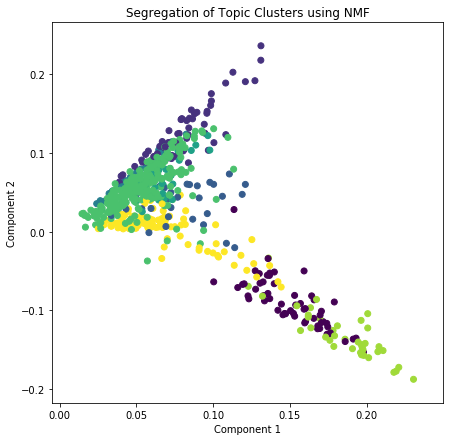

In [72]:
# Plot
plt.figure(figsize=(7, 7))
plt.scatter(x, y, c=clusters)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title("Segregation of Topic Clusters using NMF", )

# Conclusion

- By reading the text data and analysis we can say that the text data is related to different religions mainly Budhism,Tao,Christianity etc.
- Few of the religious text are related.It may be according to the region.Book of Ecclesiastes and BookOfEccleasiasticus are having highly related quotes.They both are related to Christian religion. 
- Optimal value got after applying DeD algorithm is 8. 
- Applied different Clustering Techniques. Correctly classified samples is more for Clustering using NMF. 
- NMF is the best clustering technique for this dataset. Spectral clustering also gives better result.